### Deep learning classification using textual informations

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

print(tf.__version__)

1.13.1


In [2]:
from nltk.corpus import stopwords
stop = stopwords.words('french')

In [3]:
store_references = pd.read_csv("store_references.csv")

In [4]:
import ast
def get_first_node(x):
    try:
        return ast.literal_eval(x)[0]
    except:
        None

store_references['first_node'] = pd.Categorical(store_references['classification.v0_3.node_ids'].apply(get_first_node))
store_references['fn'] = store_references['first_node'].cat.codes

In [5]:
class_names = store_references['first_node'].cat.categories

In [6]:
store_references

,_id,brand_name,label,packaging,classification.v0_3.node_ids,classification.v0_3.classified_by,first_node,fn
0,ObjectId(51d2c538c0569c851c000002),Mentos,Chewing-gum Full Ice menthe réglisse sans sucres,la boite de 50 - 100 g,"[""node-epicerie-sucree"",""node-confiseries"",""no...",admin,node-epicerie-sucree,7
1,ObjectId(51d2c538c0569c851c000003),Mentos,Bonbons tendres dragéifiés Fruit,les 4 rouleaux de 38 g,"[""node-epicerie-sucree"",""node-confiseries"",""no...",admin,node-epicerie-sucree,7
2,ObjectId(51d2c538c0569c851c000005),Glen Grant,Scotch whisky single malt,la bouteille de 70 cl,"[""node-boissons"",""node-spiritueux"",""node-eaux-...",admin,node-boissons,3
3,ObjectId(51d2c538c0569c851c000006),Alsa,Gâteau de semoule nappé de caramel,la boite de 414 g,"[""node-epicerie-sucree"",""node-aides-patisserie...",ClassificationEngine,node-epicerie-sucree,7
4,ObjectId(51d2c538c0569c851c000009),Dillon,Rhum blanc agricole Martinique,la bouteille de 100 cl,"[""node-boissons"",""node-spiritueux"",""node-eaux-...",admin,node-boissons,3
5,ObjectId(51d2c538c0569c851c00000b),Carte d'Or,Crème glacée au café arabica de Colombie,le bac de 500 g,"[""node-surgele"",""node-surgele-plats-transforme...",admin,node-surgele,14
6,ObjectId(51d2c538c0569c851c00000c),Signal,"Dentifrice Très Près gel menthe plus extrême, ...",le tube de 75 ml,"[""node-hygiene-beaute"",""node-hygiene-dentaire""...",admin,node-hygiene-beaute,9
7,ObjectId(51d2c538c0569c851c00000e),Gillette,Rasoir jetable Blue II Fixe Gillette,lot de 10 rasoirs x10,"[""node-hygiene-beaute"",""node-hygiene-corps"",""n...",admin,node-hygiene-beaute,9
8,ObjectId(51d2c538c0569c851c000010),Lu,Le Véritable Petit Beurre 'Dans la Poche',le paquet de 300 g,"[""node-epicerie-sucree"",""node-gouters"",""node-b...",legacy,node-epicerie-sucree,7
9,ObjectId(51d2c538c0569c851c000013),Lu,Biscuit chocolat & 5 céréales complètes biscuits,les 8 sachets de 4 - 400 g,"[""node-epicerie-sucree"",""node-gouters"",""node-b...",admin,node-epicerie-sucree,7


In [7]:
store_references_filtered = store_references.dropna().set_index("_id")

In [8]:
store_references_filtered.shape

(427908, 7)

In [9]:
X = store_references_filtered[['label']]
y = store_references_filtered[['fn']]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(
    strip_accents="unicode",
    stop_words=stop,
    ngram_range=(1,1),
    analyzer="word")
vectorizer.fit(X_train['label'])

train_data = vectorizer.transform(X_train['label'])
test_data = vectorizer.transform(X_test['label'])

In [14]:
vocab_size = len(vectorizer.vocabulary_)

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 10, input_length=vocab_size))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(len(store_references['fn'].unique()), activation=tf.nn.softmax))
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 28452, 10)         284520    
_________________________________________________________________
flatten (Flatten)            (None, 284520)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               36418688  
_________________________________________________________________
dense_1 (Dense)              (None, 16)                2064      
Total params: 36,705,272
Trainable params: 36,705,272
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [16]:
x_val = train_data[200000:]
partial_x_train = train_data[:200000]

y_val = train_labels[200000:].values
partial_y_train = train_labels[:200000].values

In [17]:
partial_x_train

<200000x28452 sparse matrix of type '<class 'numpy.int64'>'
	with 891891 stored elements in Compressed Sparse Row format>

In [18]:
y_val

array([[ 7],
       [ 6],
       [ 3],
       ...,
       [ 2],
       [ 9],
       [13]], dtype=int8)

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 200000 samples, validate on 86698 samples
Epoch 1/20
200000/200000 [==============================] - 1351s 7ms/sample - loss: 1.8120 - acc: 0.4891 - val_loss: 0.7225 - val_acc: 0.8073
Epoch 2/20
200000/200000 [==============================] - 1381s 7ms/sample - loss: 0.4939 - acc: 0.8611 - val_loss: 0.3804 - val_acc: 0.8895
Epoch 3/20
200000/200000 [==============================] - 1329s 7ms/sample - loss: 0.3170 - acc: 0.9053 - val_loss: 0.2976 - val_acc: 0.9114
Epoch 4/20
200000/200000 [==============================] - 1228s 6ms/sample - loss: 0.2517 - acc: 0.9241 - val_loss: 0.2642 - val_acc: 0.9198
Epoch 5/20
200000/200000 [==============================] - 1226s 6ms/sample - loss: 0.2154 - acc: 0.9345 - val_loss: 0.2454 - val_acc: 0.9251
Epoch 6/20
200000/200000 [==============================] - 1226s 6ms/sample - loss: 0.1904 - acc: 0.9413 - val_loss: 0.2384 - val_acc: 0.9277
Epoch 7/20
200000/200000 [==============================] - 1226s 6ms/sample - loss: 0.1726

In [20]:
results = model.evaluate(test_data, test_labels)

print(results)

141210/141210 [==============================] - 336s 2ms/sample - loss: 0.2679 - acc: 0.9358
[0.26790168728344643, 0.93582606]


### Simple classification using SVM

In [21]:
from sklearn import svm
lin_clf = svm.LinearSVC()
lin_clf.fit(train_data, train_labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [22]:
test_pred = lin_clf.predict(test_data)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, test_pred)

0.9315558388216132

### Deep learning classification using images

#### Load the images

In [11]:
import cv2
import glob
import matplotlib.pyplot as plt
import os

In [12]:
images_folder = "/home/till/mongo"
images_files = glob.glob("{}/*.jpg".format(images_folder))

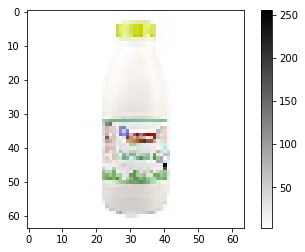

In [13]:
img = cv2.imread(images_files[0])
plt.figure()
plt.imshow(cv2.resize(img, (64, 64)), cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
def get_image_array(oid):
    filename = "{}/{}.jpg".format(images_folder, oid)
    if os.path.isfile(filename):
        try:
            return cv2.resize(cv2.imread(filename), (64, 64)) / 255
        except:
            return None

In [ ]:
store_references_filtered['image'] = store_references_filtered.index.map(get_image_array)

In [ ]:
img = store_references_filtered['image'].iloc[0]
plt.figure()
plt.imshow(img, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

#### Init the model

In [ ]:
import keras.utils.vis_utils as vutils
from IPython.display import SVG

In [ ]:
X = store_references_filtered.dropna()[['image']]
y = store_references_filtered.dropna()[['fn']]
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train['image'].iloc[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels['fn'][i]])
plt.show()

In [ ]:
X_train['image'].iloc[0].shape

In [ ]:
simple_model = keras.Sequential([
    keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=X_train['image'].iloc[0].shape),
    keras.layers.Conv2D(16, (5, 5), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(len(class_names), activation=tf.nn.softmax)
])
SVG(vutils.model_to_dot(simple_model).create(prog='dot', format='svg'))

In [ ]:
complex_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train['image'].iloc[0].shape),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.25),    
    keras.layers.Dense(len(class_names), activation=tf.nn.softmax)
])
SVG(vutils.model_to_dot(complex_model).create(prog='dot', format='svg'))

In [ ]:
simple_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
complex_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_images = np.stack(X_train['image'].values)
test_images = np.stack(X_test['image'].values)

In [ ]:
simple_model.fit(train_images, train_labels, epochs=5)

In [ ]:
test_loss, test_acc = simple_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)